In [1]:
'''Downloaded from https://datahub.io/machine-learning/mnist_784#resource-mnist_784_zip'''
# Reading data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

dataset = pd.read_csv('data\mnist_784_csv.csv')

In [2]:
# Seperating the train set and test set

train_set, test_set = dataset[:60000], dataset[60000:]
X_train, y_train = train_set.drop('class', axis=1), train_set['class']
X_test, y_test = test_set.drop('class', axis=1), test_set['class']
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


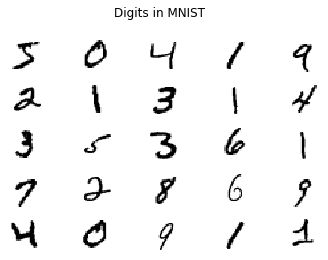

In [3]:
# plotting and visualization of data

length = 5
def plot_digit(X=X_train, length=length, title='Digits in MNIST'):
    fig, ax = plt.subplots(length, length)
    fig.suptitle(title)
    X = np.array(X)
    for i in range(length*length):
        some_digit = X[i].reshape(28,28)
        ax[i//length, i%length].imshow(some_digit, cmap=mpl.cm.binary, interpolation='nearest')
        ax[i//length, i%length].axis('off')
    plt.show()
plot_digit()

## Training ML models


In [4]:
# Random Forest Classifier
# Default: n_estimators=100

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
scores_rnd = cross_val_score(forest_clf, X_train, y_train, cv=3, verbose=2)
print(scores_rnd)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  31.6s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   31.6s remaining:    0.0s


[CV] END .................................................... total time=  31.3s
[CV] END .................................................... total time=  32.3s
[0.9646  0.96255 0.9666 ]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.6min finished


In [5]:
# SGD Classifier

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
scores_sgd = cross_val_score(sgd_clf, X_train, y_train, cv=3, verbose=2)
print(scores_sgd)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time= 1.8min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min remaining:    0.0s


[CV] END .................................................... total time= 1.6min
[CV] END .................................................... total time= 1.7min
[0.85175 0.86245 0.8785 ]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  5.1min finished


In [6]:
# K Neighbors Classifier
# Default: leaf_size=30

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
scores_knn = cross_val_score(knn, X_train, y_train, cv=3, verbose=2)
print(scores_knn)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  39.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.0s remaining:    0.0s


[CV] END .................................................... total time=  38.7s
[CV] END .................................................... total time=  42.7s
[0.9676  0.9671  0.96755]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min finished


In [7]:
# Ada Boost Classifier
# Default: n_estimators=50, algorithm='SAMME.R', learning_rate=1

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
                        DecisionTreeClassifier(), n_estimators=100,
                        algorithm="SAMME.R", learning_rate=0.1)
scores_ada = cross_val_score(ada_clf, X_train, y_train, cv=3, verbose=2)
print(scores_ada)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  16.7s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.7s remaining:    0.0s


[CV] END .................................................... total time=  16.3s
[CV] END .................................................... total time=  16.2s
[0.8557 0.8576 0.8622]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   49.6s finished


In [8]:
# Bagging Classifier
# Default: n_estimators=10

from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
                    DecisionTreeClassifier(), n_estimators=10,
                    bootstrap=True)
scores_bag = cross_val_score(bag_clf, X_train, y_train, cv=3, verbose=2)
print(scores_bag)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time= 1.6min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s


[CV] END .................................................... total time= 1.5min
[CV] END .................................................... total time= 1.5min
[0.93135 0.925   0.9413 ]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.6min finished


## Comparing Accuracy of different models

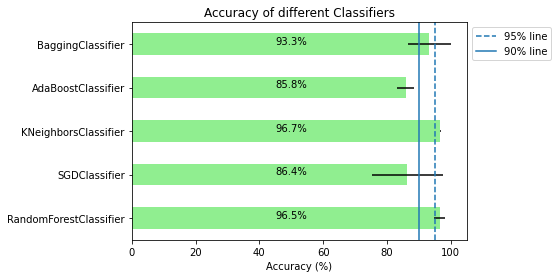

NOTE: Errorbar (blackline at the tip of the barplot) is scaled 10 times the actual value for better insight.


In [9]:
clf = [forest_clf, sgd_clf, knn, ada_clf, bag_clf]
clf = [c.__class__.__name__ for c in clf]

values = [scores_rnd, scores_sgd, scores_knn, scores_ada, scores_bag]
val_mean = [score.mean() for score in values]
val_std = [score.std()*10 for score in values]

data = np.array([val_mean, val_std]).T
data = data*100
df = pd.DataFrame(data, index=clf, columns=['mean', 'std'])
df.plot(kind='barh', y='mean', xerr='std', label='',
        color='lightgreen', title='Accuracy of different Classifiers')

plt.axvline(x=95, label='95% line', linestyle='--')
plt.axvline(x=90, label='90% line')
plt.legend(bbox_to_anchor = (1, 1))
plt.xlabel('Accuracy (%)')
for index, value in enumerate(val_mean):
    plt.text(45, index, str(round(value*100, 1))+'%')
plt.show()
print("NOTE: Errorbar (blackline at the tip of the barplot) \
is scaled 10 times the actual value for better insight.")

In [10]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_pred_knn = cross_val_predict(knn, X_train, y_train, cv=3)
y_pred_rnd = cross_val_predict(forest_clf, X_train, y_train, cv=3)

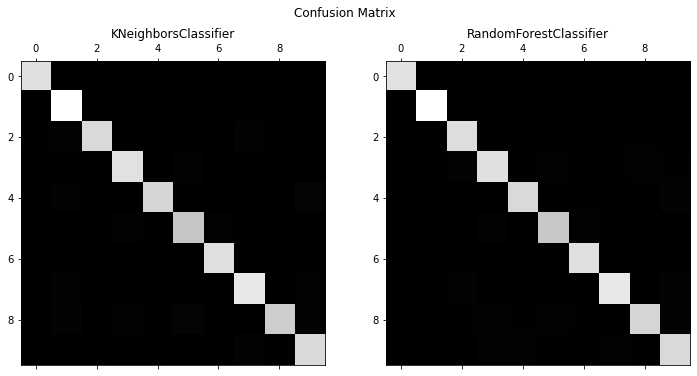

In [11]:
# Confusion Matrix

confusion_knn = confusion_matrix(y_train, y_pred_knn)
confusion_rnd = confusion_matrix(y_train, y_pred_rnd)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].matshow(confusion_knn, cmap=plt.cm.gray)
ax[1].matshow(confusion_rnd, cmap=plt.cm.gray)
ax[0].set_title('KNeighborsClassifier')
ax[1].set_title('RandomForestClassifier')
fig.suptitle('Confusion Matrix')
plt.show()

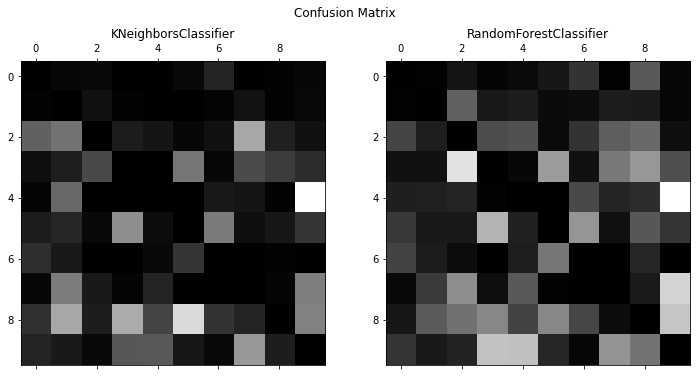

NOTE: Row represents actual classes, while columns represent predicted classes.


In [12]:
# Confusion Matrix (only the incorrect classified images)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

row_sums = confusion_knn.sum(axis=1, keepdims=True)
norm_knn = confusion_knn / row_sums
np.fill_diagonal(norm_knn, 0)
ax[0].matshow(norm_knn, cmap=plt.cm.gray)
ax[0].set_title('KNeighborsClassifier')

row_sums = confusion_rnd.sum(axis=1, keepdims=True)
norm_rnd = confusion_rnd / row_sums
np.fill_diagonal(norm_rnd, 0)
ax[1].matshow(norm_rnd, cmap=plt.cm.gray)
ax[1].set_title('RandomForestClassifier')

fig.suptitle('Confusion Matrix')
plt.show()
print('NOTE: Row represents actual classes, while columns represent predicted classes.')

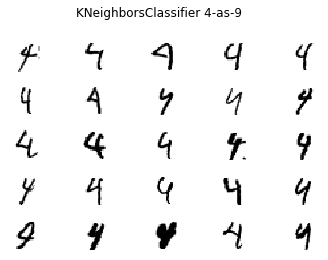

In [13]:
# in both the cases a lot of 4s were mislabelled as 9.

real_class = 4
labeled_class = 9
X_mislabeled = X_train[(y_train==real_class) & (y_pred_knn==labeled_class)]
plot_digit(X=X_mislabeled, title='KNeighborsClassifier '+str(real_class)+'-as-'+str(labeled_class))

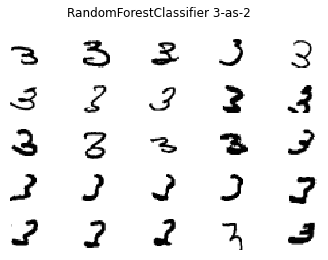

In [14]:
# RandomForestClassifier labels a lot of 3s as 2s.

real_class = 3
labeled_class = 2
X_mislabeled = X_train[(y_train==real_class) & (y_pred_rnd==labeled_class)]
plot_digit(X=X_mislabeled, title='RandomForestClassifier '+str(real_class)+'-as-'+str(labeled_class))

## GridSearchCV for Hyperparameter Tuning

In [15]:
''' Model Selected: KneighborsClassifier
    Tuning individual parameters        '''
# weights

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

parameters = [
    {
    'weights': ['uniform', 'distance']}
]
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, parameters, cv=3, scoring='accuracy', return_train_score=True, 
                           verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END ....................................weights=uniform; total time=  42.8s
[CV] END ....................................weights=uniform; total time=  55.8s
[CV] END ....................................weights=uniform; total time=  48.7s
[CV] END ...................................weights=distance; total time=  46.6s
[CV] END ...................................weights=distance; total time=  46.8s
[CV] END ...................................weights=distance; total time=  56.5s


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='accuracy', verbose=2)

In [16]:
results_weights = grid_search.cv_results_

In [17]:
# n_neighbors

parameters = [
    {
    'n_neighbors': [5, 8],
    'weights':['distance']}
]
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, parameters, cv=3, scoring='accuracy', return_train_score=True, 
                           verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END ....................n_neighbors=5, weights=distance; total time=  46.2s
[CV] END ....................n_neighbors=5, weights=distance; total time=  43.7s
[CV] END ....................n_neighbors=5, weights=distance; total time=  40.2s
[CV] END ....................n_neighbors=8, weights=distance; total time=  49.0s
[CV] END ....................n_neighbors=8, weights=distance; total time=  41.1s
[CV] END ....................n_neighbors=8, weights=distance; total time=  38.8s


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [5, 8], 'weights': ['distance']}],
             return_train_score=True, scoring='accuracy', verbose=2)

In [18]:
results_n = grid_search.cv_results_

In [19]:
# leaf_size

parameters = [
    {
    'leaf_size': [30, 50],
    'n_neighbors': [5],
    'weights':['distance']}
]
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, parameters, cv=3, scoring='accuracy', return_train_score=True, 
                           verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END ......leaf_size=30, n_neighbors=5, weights=distance; total time=  39.9s
[CV] END ......leaf_size=30, n_neighbors=5, weights=distance; total time=  38.8s
[CV] END ......leaf_size=30, n_neighbors=5, weights=distance; total time=  39.6s
[CV] END ......leaf_size=50, n_neighbors=5, weights=distance; total time=  39.1s
[CV] END ......leaf_size=50, n_neighbors=5, weights=distance; total time=  40.0s
[CV] END ......leaf_size=50, n_neighbors=5, weights=distance; total time=  39.9s


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'leaf_size': [30, 50], 'n_neighbors': [5],
                          'weights': ['distance']}],
             return_train_score=True, scoring='accuracy', verbose=2)

In [20]:
results_leaf = grid_search.cv_results_

## Comparing Different Hyperparameters of KNeighborsClassifier Model

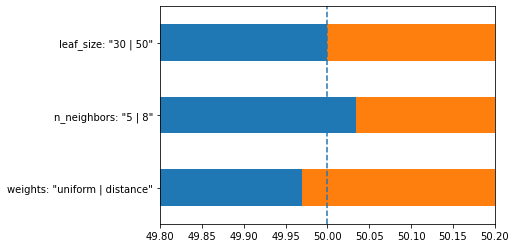

In [21]:
# Hyparameter Tuning

cols = ['weights: "uniform | distance"', 'n_neighbors: "5 | 8"', 'leaf_size: "30 | 50"']
val= [results_weights['mean_test_score'], results_n['mean_test_score'], results_leaf['mean_test_score']]
for i in range(len(val)):
    val[i]=np.array(val[i])/sum(val[i])*100

df = pd.DataFrame(val, cols)
df.plot(kind='barh', stacked=True)
plt.axvline(x=50, label='50% line', linestyle='--')
plt.xlim(49.8, 50.2)
plt.legend().remove()
plt.show()

## Final error score for KneighborsClassifier

In [22]:
# KNeighborsClassifier with Hyperparameters

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn_final = KNeighborsClassifier(weights='distance', n_neighbors=5, leaf_size=30)
scores_knn_final = cross_val_score(knn_final, X_train, y_train, cv=3, verbose=2)
print(scores_knn_final)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  38.8s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   38.9s remaining:    0.0s


[CV] END .................................................... total time=  38.9s
[CV] END .................................................... total time=  39.3s
[0.9688  0.96795 0.96905]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min finished


## Predictions on Test Data

In [23]:
# Prediction accuracy

knn_final.fit(X_train, y_train)
y_pred = knn_final.predict(X_test)

from sklearn.metrics import accuracy_score

print('Accuracy on the Test data:', accuracy_score(y_test, y_pred))

Accuracy on the Test data: 0.9691


## Data Augmentation

In [24]:
# Defining custom functions to shift the images

X_copy = X_train.copy()
def right(n, X = X_copy):
    X = X.copy()
    for i in range(28):
        for j in range(28-n):
            X.iloc[:, i*28+(27-j)] = X.iloc[:, i*28+(27-j-n)]
        for j in range(n):
            X.iloc[:, i*28+j] = 0
    return X

def left(n, X = X_copy):
    X = X.copy()
    for i in range(28):
        for j in range(28-n):
            X.iloc[:, i*28+j] = X.iloc[:, i*28+j+n]
        for j in range(n):
            X.iloc[:, i*28+(27-j)] = 0
    return X
            
def down(n, X = X_copy):
    X = X.copy()
    for i in range(28):
        for j in range(28-n):
            X.iloc[:, 28*(27-j)+i] = X.iloc[:, 28*(27-j-n)+i]
        for j in range(n):
            X.iloc[:, 28*j+i] = 0
    return X

def up(n, X = X_copy):
    X = X.copy()
    for i in range(28):
        for j in range(28-n):
            X.iloc[:, 28*j+i] = X.iloc[:, 28*(j+n)+i]
        for j in range(n):
            X.iloc[:, 28*(27-j)+i] = 0
    return X

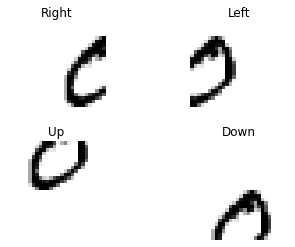

In [25]:
# checking the shifting functions

length=1
fig, ax = plt.subplots(2, 2)
Xr = np.array(right(10, X_copy.iloc[0:2]))
Xl = np.array(left(10, X_copy.iloc[0:2]))
Xu = np.array(up(10, X_copy.iloc[0:2]))
Xd = np.array(down(10, X_copy.iloc[0:2]))

some_digit = Xr[1].reshape(28,28)
ax[0, 0].imshow(some_digit, cmap=mpl.cm.binary, interpolation='nearest')
ax[0, 0].axis('off')
ax[0, 0].title.set_text('Right')

some_digit = Xl[1].reshape(28,28)
ax[0, 1].imshow(some_digit, cmap=mpl.cm.binary, interpolation='nearest')
ax[0, 1].axis('off')
ax[0, 1].title.set_text('Left')

some_digit = Xu[1].reshape(28,28)
ax[1, 0].imshow(some_digit, cmap=mpl.cm.binary, interpolation='nearest')
ax[1, 0].axis('off')
ax[1, 0].title.set_text('Up')

some_digit = Xd[1].reshape(28,28)
ax[1, 1].imshow(some_digit, cmap=mpl.cm.binary, interpolation='nearest')
ax[1, 1].axis('off')
ax[1, 1].title.set_text('Down')
plt.show()

In [26]:
# Shifting the images and appending it to the training set

X_left = left(1)
X_right = right(1)
X_up = up(1)
X_down = down(1)
X_train_aug = pd.concat([X_train, X_left, X_right, X_up, X_down], ignore_index=True)

In [27]:
X_train_aug

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
299996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
299997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
299998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Constructing the labels for the augmented training set

y_train_aug = pd.concat([y_train, y_train, y_train, y_train, y_train], ignore_index=True)

In [29]:
# KNeighborsClassifier: Cross Validation Score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn_final = KNeighborsClassifier(weights='distance', n_neighbors=5, leaf_size=30)
scores_knn_final = cross_val_score(knn_final, X_train_aug, y_train_aug, cv=3, verbose=2)
print(scores_knn_final)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=21.0min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 21.0min remaining:    0.0s


[CV] END .................................................... total time=19.7min
[CV] END .................................................... total time=19.7min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 60.4min finished


[0.98244 0.96956 0.97363]


## Final Results

In [30]:
# Final Predictions

knn_final.fit(X_train_aug, y_train_aug)
y_pred = knn_final.predict(X_test)

from sklearn.metrics import accuracy_score
print('Accuracy on the Test data:', accuracy_score(y_test, y_pred))

Accuracy on the Test data: 0.9766
